# Libraries/Packages

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st

# Basic Analysis

### Sales

In [3]:
sales_path = "data/sales.csv"
df_sales = pd.read_csv(sales_path)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


### Product Loss

In [4]:
product_loss_path = "data/product_loss.csv"
df_product_loss = pd.read_csv(product_loss_path)
df_product_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


### Products

In [5]:
products_path = "data/products.csv"
df_products = pd.read_csv(products_path)
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


### Retail Price

In [6]:
retail_price_path = "data/retail_price.csv"
df_retail_price = pd.read_csv(retail_price_path)
df_retail_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


# Top 10 Sales

In [7]:
df_total_sales = (
    df_sales[df_sales["Sale or Return"] == "sale"]  # Filtrar ventas reales
    .groupby("Item Code", as_index=False)["Quantity Sold (kilo)"]
    .sum()
    .merge(df_products, on="Item Code", how="left")  # Combinar con datos del producto
)
df_total_sales.head()

,Item Code,Quantity Sold (kilo),Item Name,Category Code,Category Name
0,102900005115168,899.837,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,333.485,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115250,2813.715,Xixia Black Mushroom (1),1011010801,Edible Mushroom
3,102900005115625,121.020,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
4,102900005115748,718.676,White Caitai,1011010101,Flower/Leaf Vegetables


In [8]:
df_ordered = df_total_sales.sort_values(by=["Quantity Sold (kilo)", "Item Name"], ascending=[False, True]).reset_index(drop=True)
df_ordered.head()

,Item Code,Quantity Sold (kilo),Item Name,Category Code,Category Name
0,102900011016701,28181.741,Wuhu Green Pepper (1),1011010504,Capsicum
1,102900005116714,27555.945,Broccoli,1011010201,Cabbage
2,102900005116899,27166.459,Net Lotus Root (1),1011010402,Aquatic Tuberous Vegetables
3,102900005115960,19196.094,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
4,102900005115779,15915.422,Yunnan Shengcai,1011010101,Flower/Leaf Vegetables


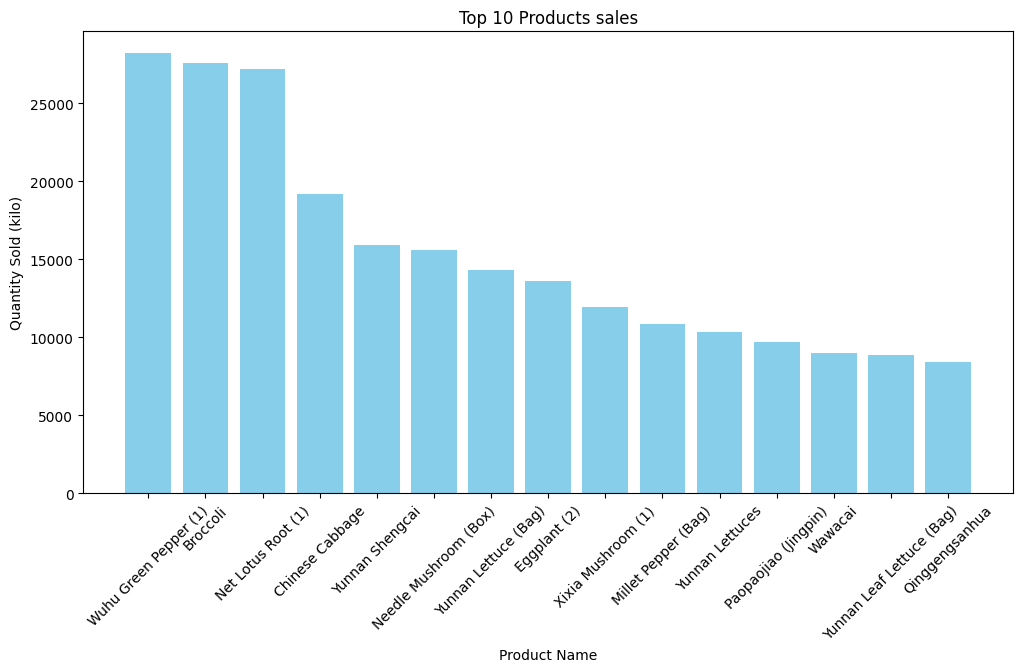

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df_ordered['Item Name'].head(15), df_ordered['Quantity Sold (kilo)'].head(15), color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Products sales')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold (kilo)')
plt.show()

In [10]:
fig = px.bar(
    df_ordered.head(15),
    x='Item Name',
    y='Quantity Sold (kilo)',
    title='Top 15 Product Sales',
    labels={
        'Item Name': 'Product Name',
        'Quantity Sold (kilo)': 'Quantity Sold (kg)'
    },
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Top loss

In [11]:
df_loss = df_product_loss.merge(df_sales, on = "Item Code", how = "left").sort_values(
    by=["Quantity Sold (kilo)"], ascending=False)

df_loss = df_loss.groupby(['Item Name', 'Loss Rate (%)'], as_index=False).agg(
    {'Quantity Sold (kilo)': 'sum'}).sort_values(by='Quantity Sold (kilo)', ascending=False)

fig = go.Figure()

# Barras
fig.add_trace(go.Bar(
    x=df_loss['Item Name'],
    y=df_loss['Quantity Sold (kilo)'] / 1000,
    name='Cantidad Vendida (mil kg)',
    marker_color='skyblue',
    yaxis='y1'
))

# Scatter
fig.add_trace(go.Scatter(
    x=df_loss['Item Name'],
    y=df_loss['Loss Rate (%)'],
    name='Tasa de pérdida (%)',
    mode='lines+markers',
    marker=dict(color='crimson', size=8),
    yaxis='y2'
))

# Ejes
fig.update_layout(
    title='Ventas vs Pérdidas por Producto',
    xaxis=dict(title='Producto'),
    yaxis=dict(title='Cantidad Vendida (mil kg)', side='left'),
    yaxis2=dict(title='Tasa de pérdida (%)', overlaying='y', side='right'),
    xaxis_tickangle=-45,
    legend=dict(x=0.01, y=0.99),
    height=500
)

fig.show()

## 📊 Sales vs. Loss Rate Analysis by Product

This chart combines the **total quantity sold (in thousands of kilograms)** with the **loss rate (%)** per product, allowing a clear visualization and assessment of each product's performance.

### ✅ Key Findings:

1. **No direct correlation between sales and loss**
   - Many high-demand products show low loss rates.
   - Others, with low sales, exhibit high loss rates.
   - 👉 This suggests that product popularity does not necessarily lead to higher spoilage.

2. **Low-selling, high-loss products**
   - Some products have low rotation and high spoilage rates.
   - 🎯 These are optimization opportunities, as they may generate more loss than revenue.

3. **Efficient products**
   - Some products have large sales volumes and very low loss rates.
   - 🟢 These are ideal for maintaining in stock, promoting, or using as benchmarks for efficient inventory management.

4. **Extreme loss values**
   - There are peaks in loss rates above 20–30%.
   - 🔍 These products should be reviewed: they might be perishable, poorly stored, or in low demand.

---

### 💡 Recommendations:
- Review products with extremely high loss rates individually.
- Focus promotions and campaigns on top-performing products.
- Consider discontinuing low-selling, high-loss products.



# Most profitable products

In [41]:
df_profitable = df_sales[df_sales["Sale or Return"] == "sale"].drop(['Time', 'Sale or Return'], axis=1).reset_index()
df_profitable = df_profitable.drop('index', axis = 1)
df_profitable = df_profitable.groupby(["Date", "Item Code", "Unit Selling Price (RMB/kg)", "Discount (Yes/No)"], as_index=False)['Quantity Sold (kilo)'].sum().reset_index()
df_profitable.drop('index', axis=1, inplace=True)
df_profitable = df_profitable.merge(df_products, on="Item Code", how="left").drop(['Category Code', 'Category Name'], axis=1)
df_profitable

,Date,Item Code,Unit Selling Price (RMB/kg),Discount (Yes/No),Quantity Sold (kilo),Item Name
0,2020-07-01,102900005115762,6.0,No,6.841,Amaranth
1,2020-07-01,102900005115779,8.0,No,41.966,Yunnan Shengcai
2,2020-07-01,102900005115786,6.0,No,11.352,Zhuyecai
3,2020-07-01,102900005115793,16.0,No,4.288,Chinese Cabbage
4,2020-07-01,102900005115823,10.0,No,11.476,Shanghaiqing
...,...,...,...,...,...,...
56501,2023-06-30,102900051000944,26.0,Yes,0.928,Honghu Lotus Root
56502,2023-06-30,106949711300259,1.2,Yes,1.000,Needle Mushroom (Box)
56503,2023-06-30,106949711300259,2.0,No,12.000,Needle Mushroom (Box)
56504,2023-06-30,106971533450003,1.8,Yes,3.000,Haixian Mushroom (Bunch)


### Sales per day

In [42]:
df_day = df_profitable.groupby('Date')['Quantity Sold (kilo)'].sum().reset_index()

fig = px.line(df_day, x='Date', y='Quantity Sold (kilo)', title='Ventas totales por día')
fig.show()

### Average price per day

In [33]:
df_price = df_profitable.groupby('Date')['Unit Selling Price (RMB/kg)'].mean().reset_index()

fig = px.line(df_price, x='Date', y='Unit Selling Price (RMB/kg)', title='Precio promedio por día')
fig.show()

### Comparison: with and without discount

In [43]:
df_discount = df_profitable.groupby('Discount (Yes/No)')['Quantity Sold (kilo)'].sum().reset_index()

fig = px.bar(df_discount, x='Discount (Yes/No)', y='Quantity Sold (kilo)', title='Ventas con y sin descuento')
fig.show()

### Top selling products

In [45]:
df_top = df_profitable.groupby('Item Name')['Quantity Sold (kilo)'].sum().reset_index().sort_values(by='Quantity Sold (kilo)', ascending=False).head(10)

fig = px.bar(df_top, x='Item Name', y='Quantity Sold (kilo)', title='Top 10 productos más vendidos')
fig.show()

### Time series by product

In [47]:
df_serie = df_profitable.groupby(['Date', 'Item Name'])['Quantity Sold (kilo)'].sum().reset_index()

fig = px.line(df_serie, x='Date', y='Quantity Sold (kilo)', color='Item Name', title='Ventas por producto en el tiempo')
fig.show()